In [111]:
# abrimos el csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tiktok = pd.read_csv('tiktok_datasetEDA.csv')
tiktok.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [112]:
# hacemos un poco de limpieza
tiktok.drop(columns=['#','video_id'], inplace=True) # De momento no necesitamos estas columnas
tiktok.head()

,claim_status,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,claim,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,claim,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,claim,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [113]:
tiktok.info() # claim_status y verified_status son de tipo object, video_duration_sec es int y el resto son float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   claim_status              19084 non-null  object 
 1   video_duration_sec        19382 non-null  int64  
 2   video_transcription_text  19084 non-null  object 
 3   verified_status           19382 non-null  object 
 4   author_ban_status         19382 non-null  object 
 5   video_view_count          19084 non-null  float64
 6   video_like_count          19084 non-null  float64
 7   video_share_count         19084 non-null  float64
 8   video_download_count      19084 non-null  float64
 9   video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.5+ MB


### NaN

In [114]:
# Vemos si hay algun nan
hayNan =tiktok[(tiktok['claim_status'].isna()) | (tiktok['video_duration_sec'].isna()) | (tiktok['verified_status'].isna()) | (tiktok['video_view_count'].isna()) | (tiktok['video_like_count'].isna())| (tiktok['video_share_count'].isna()) | (tiktok['video_download_count'].isna())| (tiktok['video_comment_count'].isna())]
tiktok.isna().any()
# len(hayNan) # Parece que hay nan en todas las columnas exxcepto en video_duration_sec y verified_status
# Hay aproximadamente unos 300 nan de 20000 muestras, por lo que podremos sustituirlo por sus medias o medianas
tiktok.info() # Como observamos hay muy pocos null por lo que podemos sustituir los Nan por las respectivas medias

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   claim_status              19084 non-null  object 
 1   video_duration_sec        19382 non-null  int64  
 2   video_transcription_text  19084 non-null  object 
 3   verified_status           19382 non-null  object 
 4   author_ban_status         19382 non-null  object 
 5   video_view_count          19084 non-null  float64
 6   video_like_count          19084 non-null  float64
 7   video_share_count         19084 non-null  float64
 8   video_download_count      19084 non-null  float64
 9   video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.5+ MB


In [115]:
# Sustuimos los null por sus respectivas medias
tiktok['video_view_count'] = tiktok['video_view_count'].fillna(tiktok['video_view_count'].mean())
tiktok['claim_status'] = tiktok['claim_status'].fillna('.') 
tiktok['video_like_count'] = tiktok['video_like_count'].fillna(tiktok['video_like_count'].mean())
tiktok['video_share_count'] = tiktok['video_share_count'].fillna(tiktok['video_share_count'].mean())
tiktok['video_download_count'] = tiktok['video_download_count'].fillna(tiktok['video_download_count'].mean())
tiktok['video_comment_count'] = tiktok['video_comment_count'].fillna(tiktok['video_comment_count'].mean())


In [116]:
tiktok['video_view_count'].describe()

count     19382.000000
mean     254708.558688
std      320401.279776
min          20.000000
25%        5026.250000
50%       22805.500000
75%      496858.000000
max      999817.000000
Name: video_view_count, dtype: float64

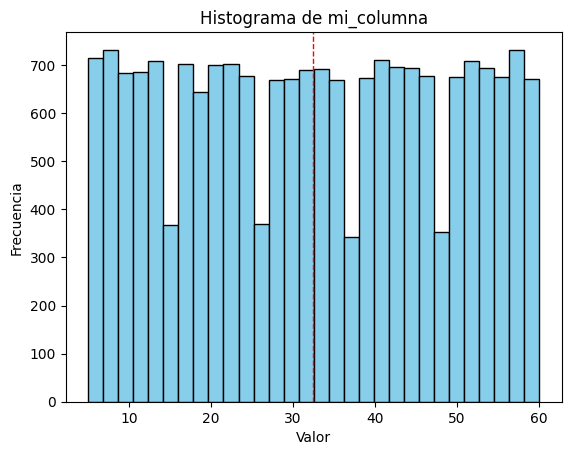

In [117]:
plt.hist(tiktok['video_duration_sec'], bins=30, color='skyblue', edgecolor='black')

# Calcular la media de la columna
mean_value = tiktok['video_duration_sec'].mean()

# Agregar una línea vertical en la media
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1)

# Agregar etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de mi_columna')

# Mostrar el histograma
plt.show()


In [118]:
tiktok.columns

Index(['claim_status', 'video_duration_sec', 'video_transcription_text',
       'verified_status', 'author_ban_status', 'video_view_count',
       'video_like_count', 'video_share_count', 'video_download_count',
       'video_comment_count'],
      dtype='object')

## Correlaciones

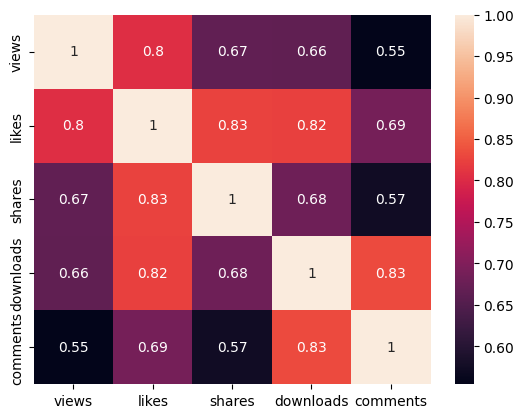

In [119]:
tiktok_corr = tiktok.copy()
tiktok_corr.drop(columns=['video_duration_sec', 'claim_status', 'verified_status', 'video_transcription_text', 'author_ban_status'], inplace=True)
tiktok_corr.columns = ['views', 'likes', 'shares', 'downloads', 'comments']
sns.heatmap(tiktok_corr.corr(numeric_only=True), annot=True);

# Observamos fuerte correlacion en las siguientes parejas:
    # likes - views
    # likes - shares
    # likes - downloads
    # downloads - comments

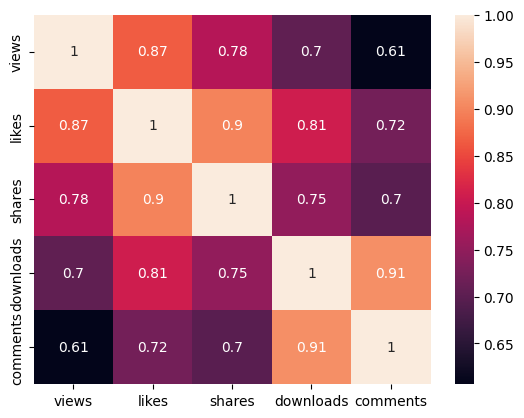

In [120]:
# Veamos ahora si esta correlacion varia para usuarios verificados 
tiktok_verified = tiktok.copy() # Para evitar warnings
tiktok_verified = tiktok_verified[tiktok_verified['verified_status'] == 'verified']
tiktok_verified.drop(columns=['video_duration_sec', 'claim_status', 'verified_status', 'video_transcription_text', 'author_ban_status'], inplace=True)
tiktok_verified.columns = ['views', 'likes', 'shares', 'downloads', 'comments'] 
sns.heatmap(tiktok_verified.corr(numeric_only=True), annot=True);

<Axes: >

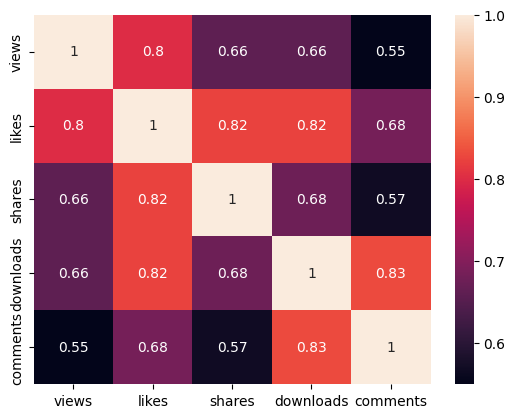

In [121]:
# Veamos ahora si esta correlacion varia para usuarios no verificados 
tiktok_not_verified = tiktok.copy() # Para evitar warnings
tiktok_not_verified = tiktok_not_verified[tiktok_not_verified['verified_status'] == 'not verified']
tiktok_not_verified.drop(columns=['video_duration_sec', 'claim_status', 'verified_status', 'video_transcription_text', 'author_ban_status'], inplace=True)
tiktok_not_verified.columns = ['views', 'likes', 'shares', 'downloads', 'comments'] 
sns.heatmap(tiktok_not_verified.corr(numeric_only=True), annot=True)

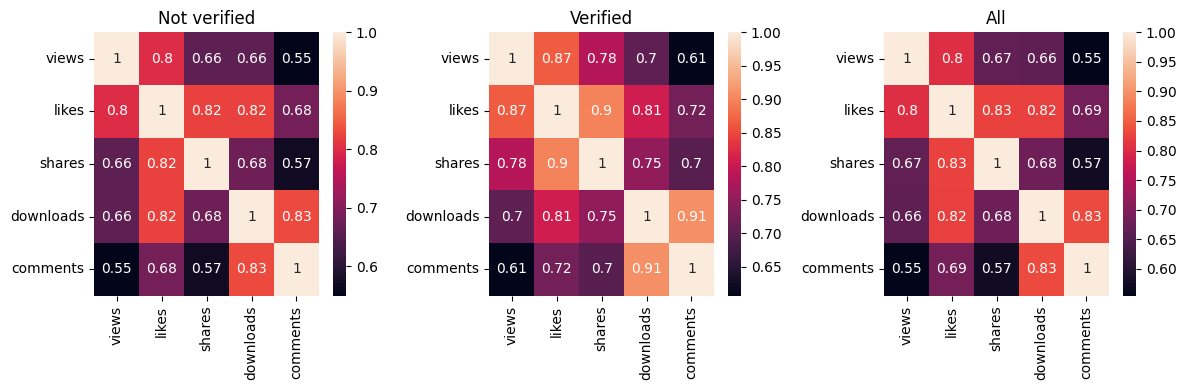

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la figura y los subgráficos
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Graficar el primer heatmap
sns.heatmap(tiktok_not_verified.corr(numeric_only=True), annot=True, ax=axs[0])
axs[0].set_title('Not verified')

# Graficar el segundo heatmap
sns.heatmap(tiktok_verified.corr(numeric_only=True), annot=True, ax=axs[1]);
axs[1].set_title('Verified')

sns.heatmap(tiktok_corr.corr(numeric_only=True), annot=True, ax=axs[2]);
axs[2].set_title('All')

# Ajustar el diseño de los subgráficos
plt.tight_layout()
plt.show()

In [123]:
# La clave para conseguir views es mediante los likes, tenemos que ver los videos mas vistos si tienen x likes y relacionarlo con su duracion y transcripcion de texto
tiktok.describe()

# Vamos a ver si cuanto duran los videos cuyos likes estan por encima de la media
media_likes = tiktok['video_like_count'].mean()
tiktok[tiktok['video_like_count'] > media_likes]['video_duration_sec'].mean()
tiktok[tiktok['video_like_count'] < media_likes]['video_duration_sec'].mean()
tiktok[tiktok['video_like_count'] == tiktok['video_like_count'].max()]['video_duration_sec']

2446    46
Name: video_duration_sec, dtype: int64

In [124]:
tiktok['video_like_count'].mean()
tiktok['video_like_count'].std()

132390.843934004

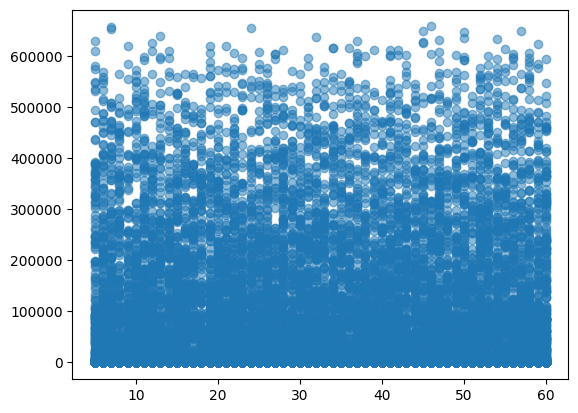

In [125]:
# igual estamos haciendo el tonto y el tiempo no esta correlacionado con los likes
plt.scatter(tiktok['video_duration_sec'], tiktok['video_like_count'], alpha=0.5)
plt.show()

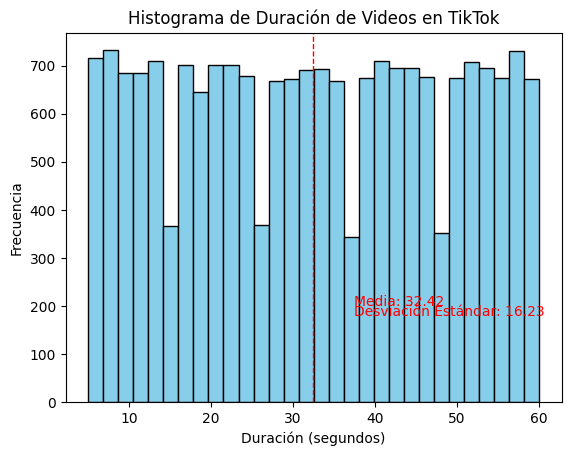

In [126]:
# Suponiendo que tienes un DataFrame llamado tiktok y una columna 'duration_seconds' que contiene la duración de los videos
# Calcula la media y la desviación estándar
mean_duration = tiktok['video_duration_sec'].mean()
std_duration = tiktok['video_duration_sec'].std()

# Crea un histograma
plt.hist(tiktok['video_duration_sec'], bins=30, color='skyblue', edgecolor='black')

# Agrega una línea vertical para la media
plt.axvline(mean_duration, color='red', linestyle='dashed', linewidth=1)

# Agrega etiquetas y título
plt.xlabel('Duración (segundos)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Duración de Videos en TikTok')

# Muestra la media y la desviación estándar en el gráfico
plt.text(mean_duration + 5, 200, f'Media: {mean_duration:.2f}', color='red')
plt.text(mean_duration + 5, 180, f'Desviación Estándar: {std_duration:.2f}', color='red')

# Muestra el histograma
plt.show()


In [127]:
# Como podemos obervar la duracion de los videos no esta distribuida en una normal ya que los datos no se distribuyen en torno a la normal
# tambien podemos observar que no esta significamente sesgado ni por derecha ni por izquierda podriamos determinar que realmente no hay patrones
# significativamente mas usados

## Verified

In [128]:
# Realmente necesitamos estar verificados para conseguir una muy buena viualizacion
tiktok.groupby(['verified_status'])['video_view_count'].sum()
tiktok['verified_status'].value_counts()

verified_status
not verified    18142
verified         1240
Name: count, dtype: int64

## Claim status

In [129]:
# Ahora hacemos lo mismo pero para las claims/opinion para ver que es mejor, hacemos un conteo de que tiene mas vistas 
tiktok.head()
tiktok.groupby(['claim_status'])['video_view_count'].sum() # ¿Como es esto posible? , mostramos histograma

claim_status
.          7.590315e+07
claim      4.813891e+09
opinion    4.696715e+07
Name: video_view_count, dtype: float64

In [130]:
# Ahora hacemos lo mismo pero para las claims/opinion para ver que es mejor, hacemos un conteo de que tiene mas vistas 
tiktok.head()
tiktok.groupby(['claim_status'])['video_view_count'].sum() # ¿Como es esto posible? , mostramos histograma

claim_status
.          7.590315e+07
claim      4.813891e+09
opinion    4.696715e+07
Name: video_view_count, dtype: float64

In [131]:
# Para analizar mejor los resultados, cuantos verified hay
(tiktok['verified_status'].value_counts()/len(tiktok['verified_status']))*100
# Como vemos el verified representa un 6 % del total por lo que los no_verified y el all representan practicamente el mismo resultado

verified_status
not verified    93.602311
verified         6.397689
Name: count, dtype: float64

In [132]:
# Ahora hacemos lo mismo pero para las claims/opinion para ver que es mejor, hacemos un conteo de que tiene mas vistas 
tiktok.head()
tiktok.groupby(['claim_status'])['video_view_count'].sum() # ¿Como es esto posible? , mostramos histograma

claim_status
.          7.590315e+07
claim      4.813891e+09
opinion    4.696715e+07
Name: video_view_count, dtype: float64

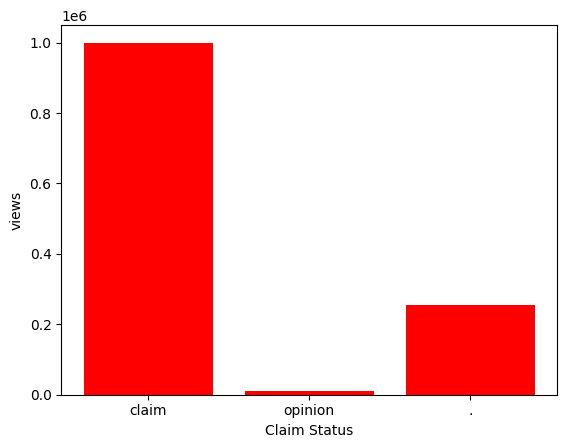

claim_status
claim      9608
opinion    9476
.           298
Name: count, dtype: int64

In [133]:
# Grafico de claim vs opionions
plt.bar(tiktok['claim_status'], tiktok['video_view_count'], color='r')
# Agregar etiquetas y título
plt.xlabel('Claim Status')
plt.ylabel('views')
# Mostrar el gráfico

plt.show()
# Pero... tienen un numero parecido de muestras? 
tiktok['claim_status'].value_counts() 


In [134]:
# Como el punto representa menos del 1 % podriamos quitarlo de la columna
tiktok_sin_punto = tiktok[~tiktok['claim_status'].str.contains('\.')]
tiktok_sin_punto['claim_status'].value_counts()

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\pabma\AppData\Local\Temp\ipykernel_17852\999975793.py:2: SyntaxWarning: invalid escape sequence '\.'
  tiktok_sin_punto = tiktok[~tiktok['claim_status'].str.contains('\.')]


claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

In [1]:
# Agrupar por claim_status y verified_status, y sumar las vistas de video
grouped_data = tiktok_sin_punto.groupby(['claim_status', 'verified_status'])['video_view_count'].sum().unstack()

# Crear un gráfico de barras agrupado
grouped_data.plot(kind='bar')

# Agregar etiquetas y título
plt.xlabel('Claim Status')
plt.ylabel('Suma de Video View Count')
plt.title('Suma de Video View Count por Claim Status y Verified Status')

# Mostrar el gráfico
plt.show() # ¿Como es esto posible? , mostramos histograma


NameError: name 'tiktok' is not defined

### verified status

657830.0

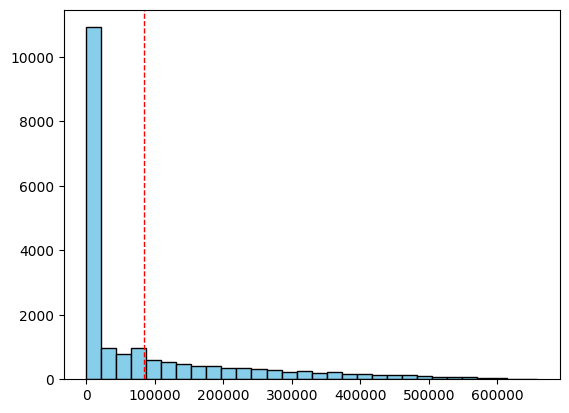

In [136]:
# Como los likes afectan a las visualizaciones
# Crea un histograma
plt.hist(tiktok['video_like_count'], bins=30, color='skyblue', edgecolor='black')

# Agrega una línea vertical para la media
plt.axvline(tiktok['video_like_count'].mean(), color='red', linestyle='dashed', linewidth=1)
tiktok['video_like_count'].max()

In [137]:
media_likes = tiktok['video_like_count'].mean()
porcentaje_mayor = (100*tiktok[tiktok['video_like_count'] >= media_likes].count()/len(tiktok['video_like_count']))['video_like_count'] 
porcentaje_menor = 100 - porcentaje_mayor
print(porcentaje_menor, porcentaje_mayor)
tiktok['video_like_count'].describe()
tiktok['video_like_count'].quantile(0.25)

68.38819523269012 31.611804767309874


833.0

In [138]:
# Como obersvamos existe una cantidad inmensa de videos con pocos likes y una cantidad reducida con el resto de likes
# Son los que estan por encima de la media cuentas verificadas? 
tiktok['video_like_count'].describe()
porcentaje_mayor_verificados = tiktok[(tiktok['video_like_count'] >= media_likes) & (tiktok['verified_status'] == 'verified')].count()
porcentaje_mayor_verificados

claim_status                169
video_duration_sec          169
video_transcription_text    129
verified_status             169
author_ban_status           169
video_view_count            169
video_like_count            169
video_share_count           169
video_download_count        169
video_comment_count         169
dtype: int64

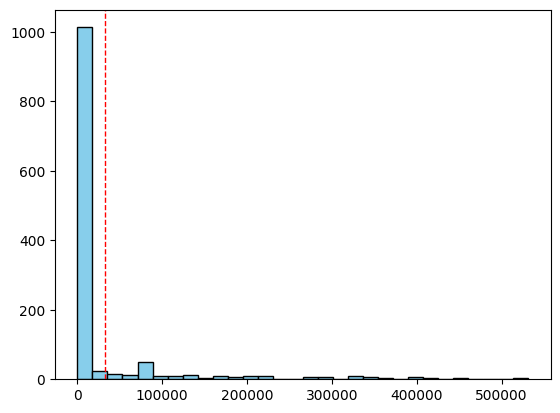

In [139]:
# Para ver esto mejor vamos a ver una campana de likes de verificados vs no verificados
plt.hist(tiktok[tiktok['verified_status'] == 'verified']['video_like_count'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(tiktok[tiktok['verified_status'] == 'verified']['video_like_count'].mean(), color='red', linestyle='dashed', linewidth=1)

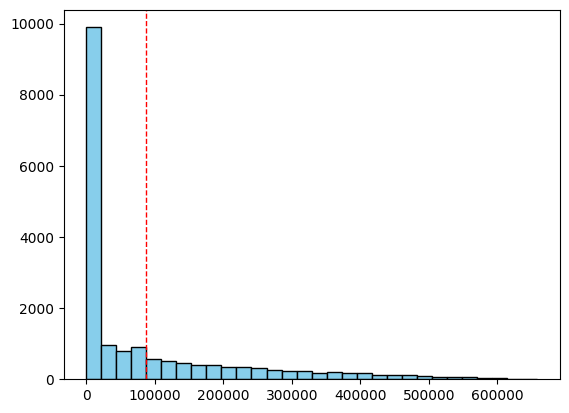

In [140]:
plt.hist(tiktok[tiktok['verified_status'] == 'not verified']['video_like_count'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(tiktok[tiktok['verified_status'] == 'not verified']['video_like_count'].mean(), color='red', linestyle='dashed', linewidth=1)

In [141]:
# Como vemos la media esta desplazada en los no verificados por lo que, a pesar de tener muchas mas muestras, estar verificado no indica
# un claro factor en tener numero de likes que esta fuertemente correlacionado con las vistas, hacemos lo mismo con las visualizaciones

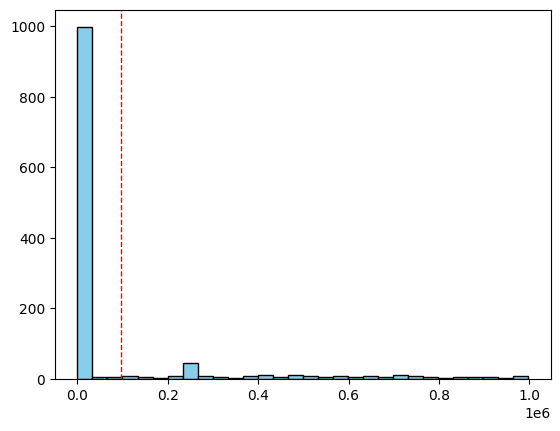

In [142]:
plt.hist(tiktok[tiktok['verified_status'] == 'verified']['video_view_count'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(tiktok[tiktok['verified_status'] == 'verified']['video_view_count'].mean(), color='red', linestyle='dashed', linewidth=1)

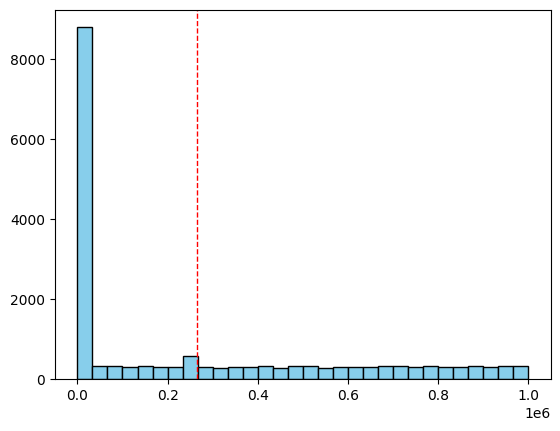

In [143]:
plt.hist(tiktok[tiktok['verified_status'] == 'not verified']['video_view_count'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(tiktok[tiktok['verified_status'] == 'not verified']['video_view_count'].mean(), color='red', linestyle='dashed', linewidth=1)

In [144]:
tiktok.head()

,claim_status,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,claim,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,claim,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,claim,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


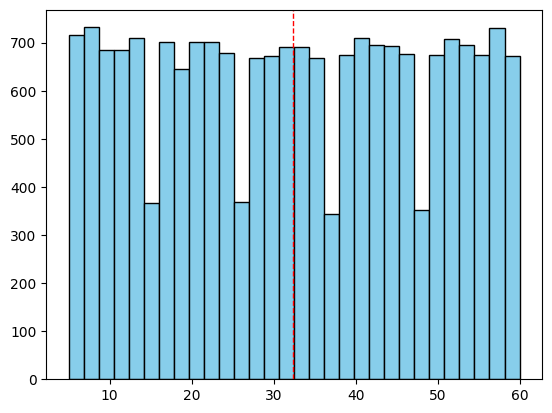

In [145]:
# Esto no nos dice practicamente nada, tendremos que relacionarlo de alguna manera con las visualizaciones
plt.hist(tiktok['video_duration_sec'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(mean_duration, color='red', linestyle='dashed', linewidth=1)

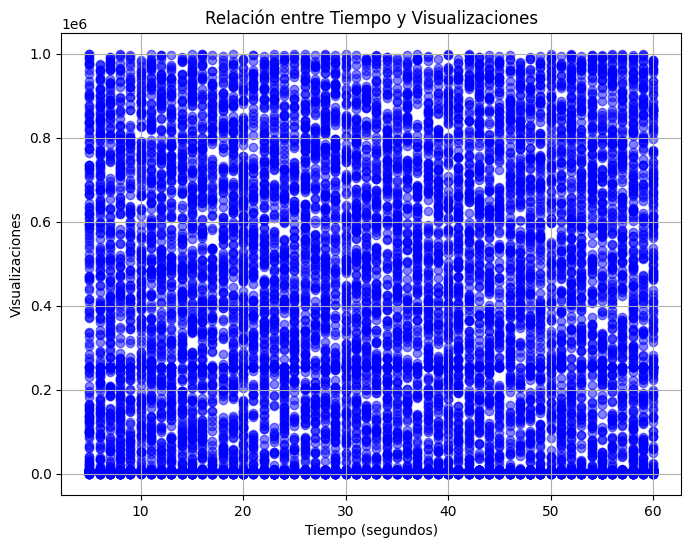

In [146]:
plt.figure(figsize=(8, 6))
plt.scatter(tiktok['video_duration_sec'], tiktok['video_view_count'], color='blue', alpha=0.5) # Scatter plot
plt.title('Relación entre Tiempo y Visualizaciones')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Visualizaciones')
plt.grid(True)
plt.show()
# Obervamos que a simple vista no hay un patron claro y que tampoco ayuda que existan casi 20000 muestras, asi que podemos cortar en intervalos para
# apreciar mejor los resultados

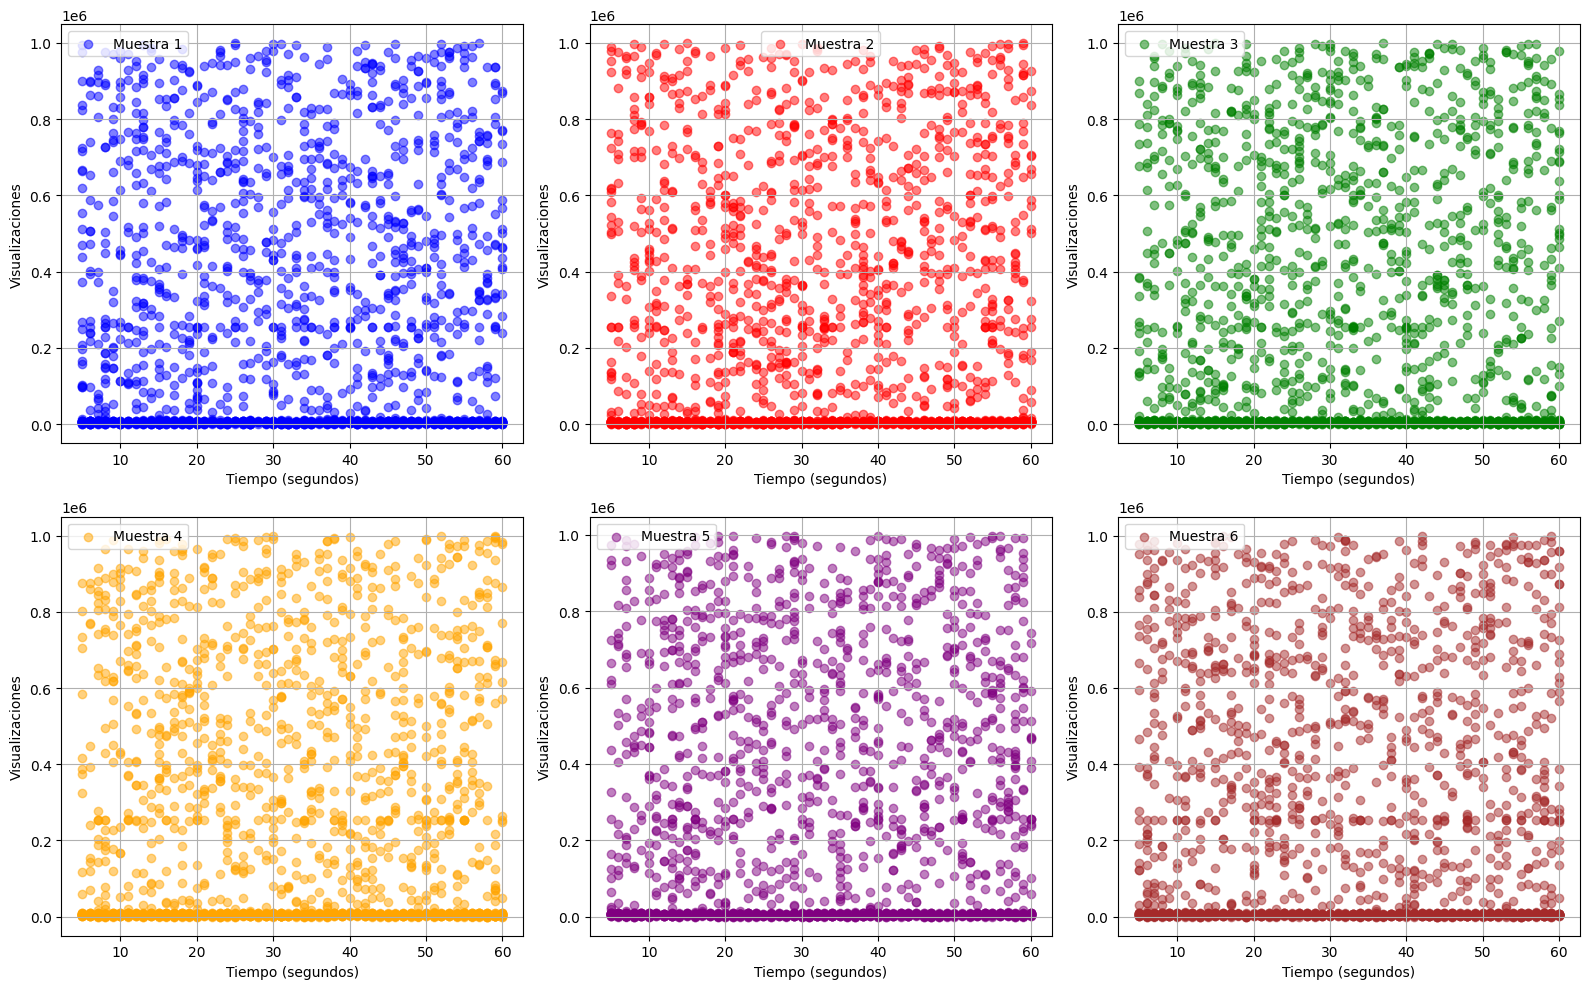

In [147]:
# Vamos a coger 100 muestras aleatorias para empezar
muestras_1000_1 = tiktok.sample(2000)
muestras_1000_2 = tiktok.sample(2000)
muestras_1000_3 = tiktok.sample(2000)
muestras_1000_4 = tiktok.sample(2000)
muestras_1000_5 = tiktok.sample(2000)
muestras_1000_6 = tiktok.sample(2000)

def scatter_plot(ax, x, y, color, label):
    ax.scatter(x, y, color=color, alpha=0.5, label=label)
    ax.set_xlabel('Tiempo (segundos)')
    ax.set_ylabel('Visualizaciones')
    ax.grid(True)
    ax.legend()

fig, axs = plt.subplots(2, 3, figsize=(16, 10))
scatter_plot(axs[0, 0], muestras_1000_1['video_duration_sec'], muestras_1000_1['video_view_count'], color='blue', label='Muestra 1')
scatter_plot(axs[0, 1], muestras_1000_2['video_duration_sec'], muestras_1000_2['video_view_count'], color='red', label='Muestra 2')
scatter_plot(axs[0, 2], muestras_1000_3['video_duration_sec'], muestras_1000_3['video_view_count'], color='green', label='Muestra 3')
scatter_plot(axs[1, 0], muestras_1000_4['video_duration_sec'], muestras_1000_4['video_view_count'], color='orange', label='Muestra 4')
scatter_plot(axs[1, 1], muestras_1000_5['video_duration_sec'], muestras_1000_5['video_view_count'], color='purple', label='Muestra 5')
scatter_plot(axs[1, 2], muestras_1000_6['video_duration_sec'], muestras_1000_6['video_view_count'], color='brown', label='Muestra 6')

plt.tight_layout()
plt.show()

In [ ]:
tiktok['duration'] = 

### longitud de texto transcrito

In [178]:
tiktok.head()

,claim_status,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,claim,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,claim,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,claim,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,claim,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,claim,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


<Axes: xlabel='text_length', ylabel='Count'>

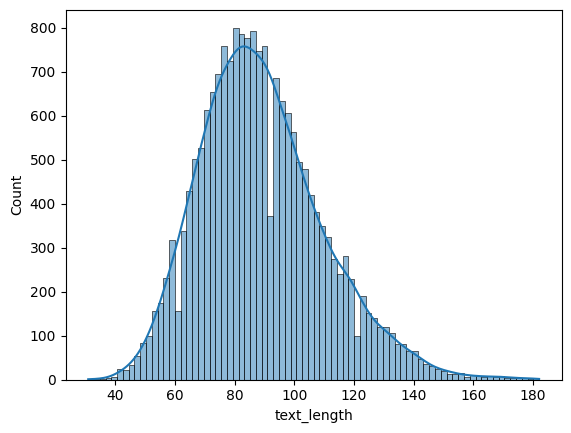

In [188]:
# Veamos como se distribuye primero    
sns.histplot(tiktok['text_length'], kde=True) 

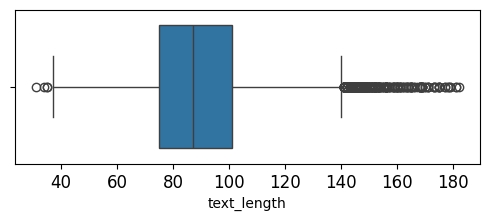

In [189]:
plt.figure(figsize=(6,2))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=tiktok['text_length'])
plt.show()

In [185]:

tiktok[tiktok['text_length'] < 25].count()

claim_status                0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
text_length                 0
dtype: int64

In [148]:
# Despues de estas visualizaciones podremos concluir que nno existe un patron claro, al menos a simple vista de tiempo que obtenga mejor resultado
# que otros tiempos, sin embargo esta claro que la mayoria de videos tienen pocas visualizaciones y solo una parte minoritaria consigue ascender 
# a los puestos mas altos

In [149]:
# ¿Como recompensa el algoritmo los videos? --> los videos mas recompensados seran 
'''
Como obersvamos en las ultimas graficas el algoritmo no tiene porque recompensar especialmente las cuentas verificadas, si es cierto
que no existen las suficientes muestras de cuentas de verificadas para dar una conclusion fuerte, pero si que no parece tan evidente como 
creiamos y podriamos descartar la idea de que tener una cuenta verificada no es estrictamente necesario para un buen crecimiento en visualizaciones
lo que si hemos podido comprobar es una relacion directa en el desplazamiento de medias en likes y visualizacciones, por lo tanto un alto nivel de likes
podria significar un alto nivel de visualizaciones. La conclusion mas fuerte que podemos dar es que si queremos maximizar la retencion nuestros
videos es que deben ser claims y no opinions y por ultimo tenemos que ver un poquito como afecta la duracion de los videos a estos, cuales son aquellas 
duraciones que tenemos que evitar lo maximo posible. Realmente no es posible o no existe ningun patron de tiempo que determine el exito de un video. 
El factor predominante como se suponia era el contenido del video, siendo el resto de elementos factores complementarios a este.
'''

'\nComo obersvamos en las ultimas graficas el algoritmo no tiene porque recompensar especialmente las cuentas verificadas, si es cierto\nque no existen las suficientes muestras de cuentas de verificadas para dar una conclusion fuerte, pero si que no parece tan evidente como \ncreiamos y podriamos descartar la idea de que tener una cuenta verificada no es estrictamente necesario para un buen crecimiento en visualizaciones\nlo que si hemos podido comprobar es una relacion directa en el desplazamiento de medias en likes y visualizacciones, por lo tanto un alto nivel de likes\npodria significar un alto nivel de visualizaciones. La conclusion mas fuerte que podemos dar es que si queremos maximizar la retencion nuestros\nvideos es que deben ser claims y no opinions y por ultimo tenemos que ver un poquito como afecta la duracion de los videos a estos, cuales son aquellas \nduraciones que tenemos que evitar lo maximo posible. Realmente no es posible o no existe ningun patron de tiempo que dete

## Evitar baneos

In [150]:
# Vamos a intentar conseguir algunos patrones en el texto transcrito que determinen si el autor puede ser baneado
tiktok.head()

,claim_status,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,claim,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,claim,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,claim,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [151]:
tiktok['text_length'] = tiktok['video_transcription_text'].apply(lambda x: len(str(x)))
tiktok.head()

,claim_status,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,claim,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,claim,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,claim,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,claim,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,claim,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


In [152]:
tiktok_baneados = tiktok[tiktok['author_ban_status'] == 'banned']
tiktok_under_review = tiktok[tiktok['author_ban_status'] == 'under review']
tiktok_activos = tiktok[tiktok['author_ban_status'] == 'active']
tiktok['author_ban_status'].value_counts(normalize=True)*100 # En porcentaje

author_ban_status
active          80.812094
under review    10.731607
banned           8.456300
Name: proportion, dtype: float64

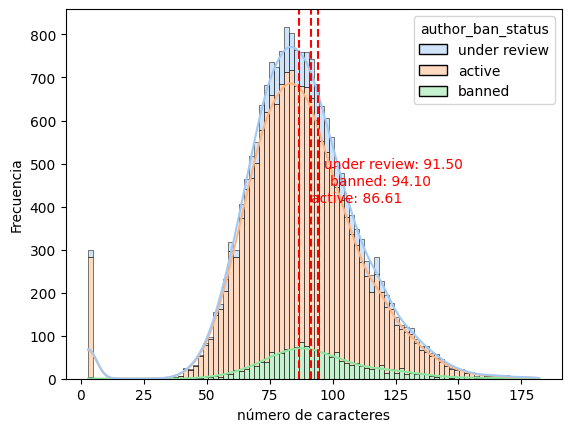

In [153]:
# Crear el histograma
sns.histplot(data=tiktok, stat="count", multiple="stack", x="text_length", kde=True, palette="pastel", 
             hue="author_ban_status", element="bars", legend=True)

# Calcular las medias para cada categoría
mean_data = tiktok.groupby("author_ban_status")["text_length"].mean()

# Definir un desplazamiento vertical inicial para los textos de las medias
vertical_offset = 10

# Dibujar líneas verticales para las medias y agregar etiquetas personalizadas
for status, mean_value in mean_data.items():
    # Ajustar la posición de la línea de media para evitar superposición con la leyenda
    plt.axvline(x=mean_value, color='r', linestyle='--')
    # Ajustar la posición vertical de los textos de las medias para evitar superposiciones
    plt.text(mean_value + 5, 400 + vertical_offset, f'{status}: {mean_value:.2f}', color='red')
    # Aumentar el desplazamiento vertical para el siguiente texto de la media
    vertical_offset += 40

# Añadir etiqueta al eje x y al eje y
plt.xlabel("número de caracteres")
plt.ylabel("Frecuencia")
plt.show()

# Podriamos considerar que la longitud del texto transcrito tiene que ver con la posibilidad de ser baneado, podemos intentar
# confirmandolo haciendo alguna correlacion

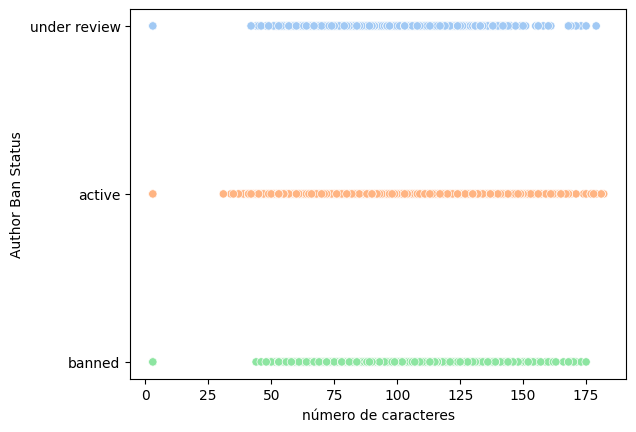

In [177]:
# Crear el scatter plot
sns.scatterplot(data=tiktok, x="text_length", y="author_ban_status", hue="author_ban_status", palette="pastel", legend=False)

# Añadir etiqueta al eje x y al eje y
plt.xlabel("número de caracteres")
plt.ylabel("Author Ban Status")

plt.show()


In [154]:
tiktok.describe()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
count,19382.000000,19382.000000,19382.000000,19382.000000,19382.000000,19382.000000,19382.000000
mean,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146,87.769838
std,16.229967,320401.279776,132390.843934,31788.928017,1988.831262,793.467473,23.095171
min,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,18.000000,5026.250000,833.000000,119.000000,7.000000,1.000000,74.000000
50%,32.000000,22805.500000,3705.500000,777.500000,49.000000,10.000000,87.000000
75%,47.000000,496858.000000,122187.500000,17713.750000,1121.750000,324.000000,101.000000
max,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000,182.000000


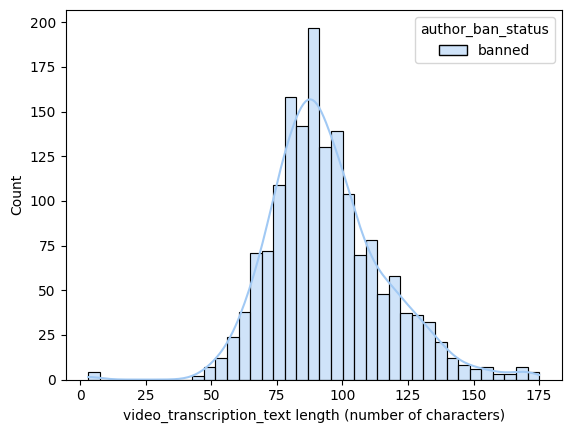

In [155]:
sns.histplot(data=tiktok_baneados, stat="count", multiple="stack", x="text_length", kde=True, palette="pastel", 
             hue="author_ban_status", element="bars", legend=True)
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.show()

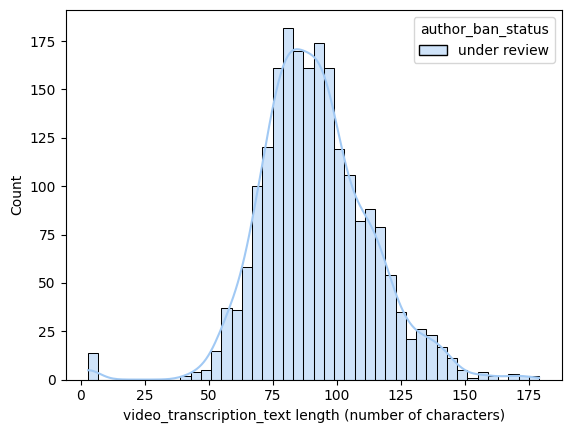

In [156]:
sns.histplot(data=tiktok_under_review, stat="count", multiple="stack", x="text_length", kde=True, palette="pastel", 
             hue="author_ban_status", element="bars", legend=True)
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.show()

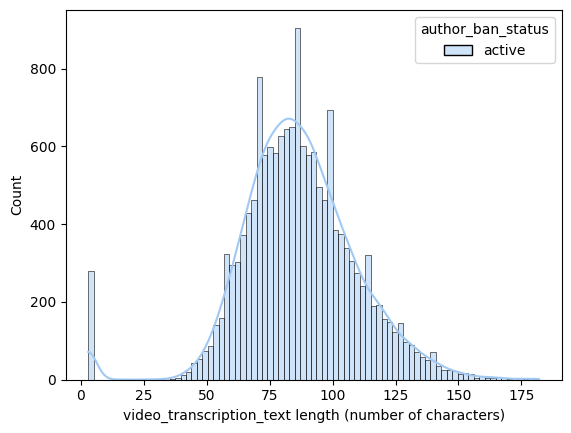

In [157]:
sns.histplot(data=tiktok_activos, stat="count", multiple="stack", x="text_length", kde=True, palette="pastel", 
             hue="author_ban_status", element="bars", legend=True)
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.show()

In [158]:
tiktok_baneados.count() # Como solo hay 1639 muestras podemos intentar ver el texto en si
tiktok_baneados.head()

,claim_status,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
22,claim,52,"someone shared with me that about once a year,...",not verified,banned,60096.0,34245.0,11345.0,219.0,77.0,102
31,claim,21,someone shared with me that a blue whale's hea...,not verified,banned,376637.0,226700.0,69329.0,2060.0,278.0,85
61,claim,32,a friend shared with a friend that starting in...,not verified,banned,29060.0,1219.0,171.0,3.0,1.0,169
67,claim,55,a friend shared with a friend that sputnik was...,not verified,banned,663764.0,113266.0,31512.0,2325.0,564.0,86
75,claim,17,a friend shared with a friend that the eiffel ...,not verified,banned,248398.0,139777.0,17309.0,1639.0,209.0,75


In [159]:
# Podemos probar creando un diccionario con las palabras mas frecuentes
dicc = {}
dicc_limpio = {}

def dic(x, dicc):
    y = x.split() # esto es la lista
    for i in y:
        if i in dicc:
            dicc[i] += 1
        else:
            dicc[i] = 1

tiktok_baneados['video_transcription_text'].apply(lambda x: dic(str(x), dicc)) # Llenamos el diccionario

palabras_a_eliminar = ['a','were','as','be','it','most','will','our','i', 'the', 'that', 'in', 'on', 'of', 'is', 'an', 'are', 'to', 'my', 'has', 'can', 'from', 'by', 'than', 'was', 'their', 'have', 'for', 'and']
for clave, valor in dicc.items():
    if clave not in palabras_a_eliminar:
        dicc_limpio[clave] = valor

diccionario_ordenado = dict(sorted(dicc_limpio.items(), key=lambda item: item[1], reverse=True))
diccionario_ordenado

{'claim': 505,
 'read': 492,
 'learned': 455,
 'someone': 418,
 'friend': 387,
 'media': 374,
 'colleague': 358,
 'discovered': 319,
 'news': 234,
 'world': 137,
 'internet': 135,
 'online': 127,
 'social': 123,
 'revealed': 113,
 'website': 105,
 'forum': 104,
 'discussion': 104,
 'board': 104,
 'earth': 95,
 'mentioning': 89,
 'only': 80,
 'first': 79,
 'claiming': 76,
 'there': 69,
 'more': 67,
 'with': 61,
 'mentioned': 61,
 'told': 60,
 'over': 59,
 'expert': 59,
 'around': 58,
 'reported': 57,
 'times': 54,
 'humans': 54,
 'claimed': 54,
 'american': 50,
 'tv': 50,
 'about': 49,
 'radio': 49,
 'study': 49,
 'number': 48,
 'people': 48,
 'car': 47,
 'average': 47,
 'largest': 45,
 'at': 44,
 'day': 43,
 'system': 43,
 'article': 43,
 'time': 42,
 'report': 42,
 'story': 41,
 'them': 40,
 'up': 39,
 'never': 38,
 '1': 37,
 'moon': 37,
 'years': 36,
 'sleep': 36,
 'every': 36,
 'all': 35,
 'one': 35,
 'single': 34,
 'solar': 34,
 'population': 33,
 'encountered': 33,
 "family's": 33

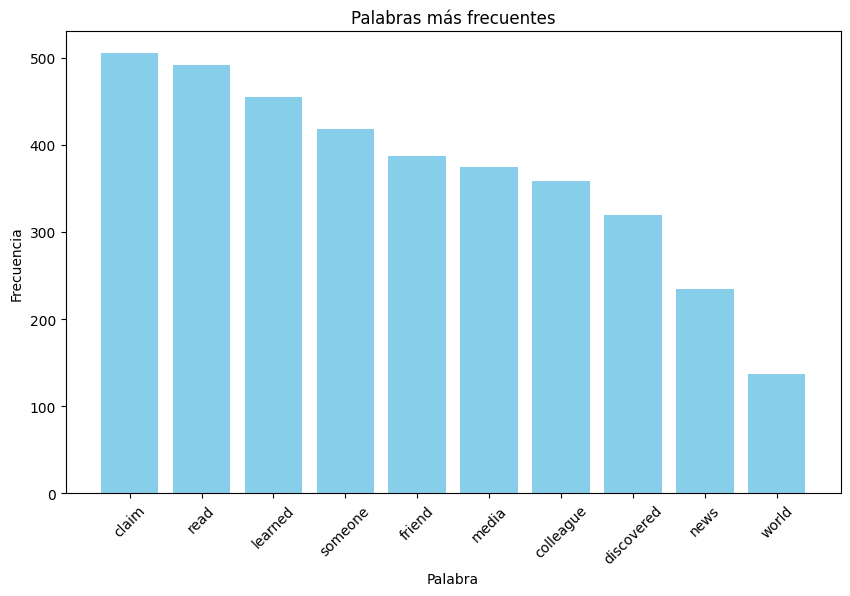

In [160]:
palabras = list(diccionario_ordenado.keys())[:10]
frecuencias = list(diccionario_ordenado.values())[:10]

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(palabras, frecuencias, color='skyblue')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes')
plt.xticks(rotation=45)  # Rotamos las etiquetas del eje x para que sean legibles
plt.show()

In [161]:
# Podemos probar creando un diccionario con las palabras mas frecuentes
dicc = {}
dicc_limpio = {}

def dic(x, dicc):
    y = x.split() # esto es la lista
    for i in y:
        if i in dicc:
            dicc[i] += 1
        else:
            dicc[i] = 1

tiktok_activos['video_transcription_text'].apply(lambda x: dic(str(x), dicc)) # Llenamos el diccionario

palabras_a_eliminar = ['a','were','as','be','it','most','will','our','i', 'the', 'that', 'in', 'on', 'of', 'is', 'an', 'are', 'to', 'my', 'has', 'can', 'from', 'by', 'than', 'was', 'their', 'have', 'for', 'and']
for clave, valor in dicc.items():
    if clave not in palabras_a_eliminar:
        dicc_limpio[clave] = valor

diccionario_ordenado_otro = dict(sorted(dicc_limpio.items(), key=lambda item: item[1], reverse=True))

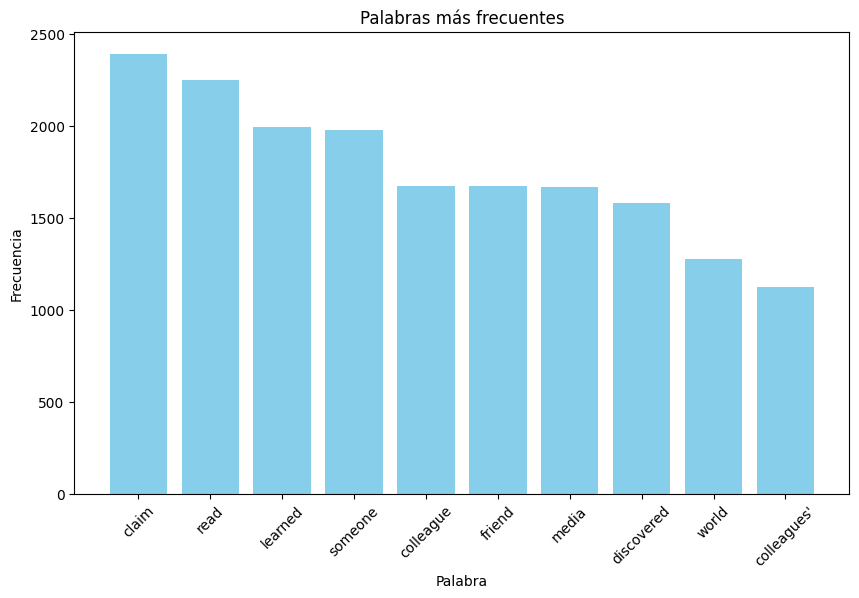

In [162]:
palabras = list(diccionario_ordenado_otro.keys())[:10]
frecuencias = list(diccionario_ordenado_otro.values())[:10]

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(palabras, frecuencias, color='skyblue')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes')
plt.xticks(rotation=45)  # Rotamos las etiquetas del eje x para que sean legibles
plt.show()

In [163]:
# Podemos probar creando un diccionario con las palabras mas frecuentes
dicc = {}
dicc_limpio = {}

def dic(x, dicc):
    y = x.split() # esto es la lista
    for i in y:
        if i in dicc:
            dicc[i] += 1
        else:
            dicc[i] = 1

tiktok_under_review['video_transcription_text'].apply(lambda x: dic(str(x), dicc)) # Llenamos el diccionario

palabras_a_eliminar = ['a','were','as','be','it','most','will','our','i', 'the', 'that', 'in', 'on', 'of', 'is', 'an', 'are', 'to', 'my', 'has', 'can', 'from', 'by', 'than', 'was', 'their', 'have', 'for', 'and']
for clave, valor in dicc.items():
    if clave not in palabras_a_eliminar:
        dicc_limpio[clave] = valor

diccionario_ordenado = dict(sorted(dicc_limpio.items(), key=lambda item: item[1], reverse=True))
diccionario_ordenado

{'claim': 603,
 'read': 562,
 'learned': 502,
 'someone': 471,
 'media': 451,
 'friend': 430,
 'colleague': 386,
 'discovered': 365,
 'news': 265,
 'world': 164,
 'internet': 153,
 'earth': 134,
 'discussion': 130,
 'board': 130,
 'social': 126,
 'forum': 121,
 'only': 120,
 'there': 118,
 'website': 115,
 'online': 110,
 'revealed': 109,
 'first': 95,
 'claiming': 87,
 'more': 85,
 'with': 83,
 'mentioning': 81,
 'system': 75,
 'over': 75,
 'told': 71,
 'around': 69,
 'one': 67,
 'day': 63,
 'mentioned': 63,
 'radio': 62,
 'tv': 61,
 "colleagues'": 61,
 'people': 59,
 'your': 59,
 'about': 59,
 'solar': 59,
 'average': 59,
 'humans': 58,
 'at': 57,
 'willing': 57,
 'me': 56,
 'largest': 55,
 'car': 55,
 'moon': 54,
 'story': 53,
 'view': 53,
 "friends'": 53,
 'days': 51,
 'grow': 51,
 'longest': 50,
 'time': 49,
 'every': 49,
 'friends': 49,
 'times': 48,
 'up': 47,
 'used': 47,
 'american': 47,
 'mars': 46,
 'family': 46,
 'two': 45,
 'report': 45,
 'when': 44,
 'study': 44,
 "family

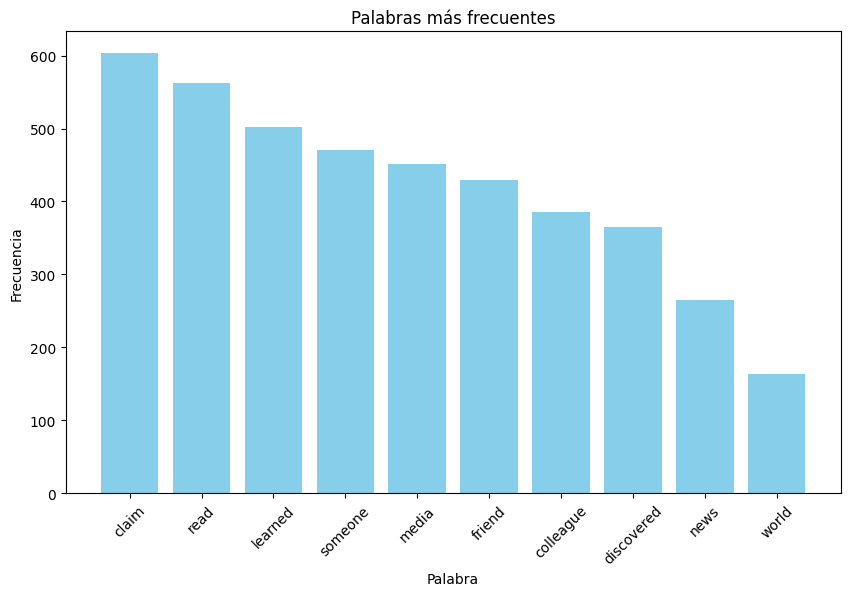

In [164]:
palabras = list(diccionario_ordenado.keys())[:10]
frecuencias = list(diccionario_ordenado.values())[:10]

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(palabras, frecuencias, color='skyblue')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes')
plt.xticks(rotation=45)  # Rotamos las etiquetas del eje x para que sean legibles
plt.show()

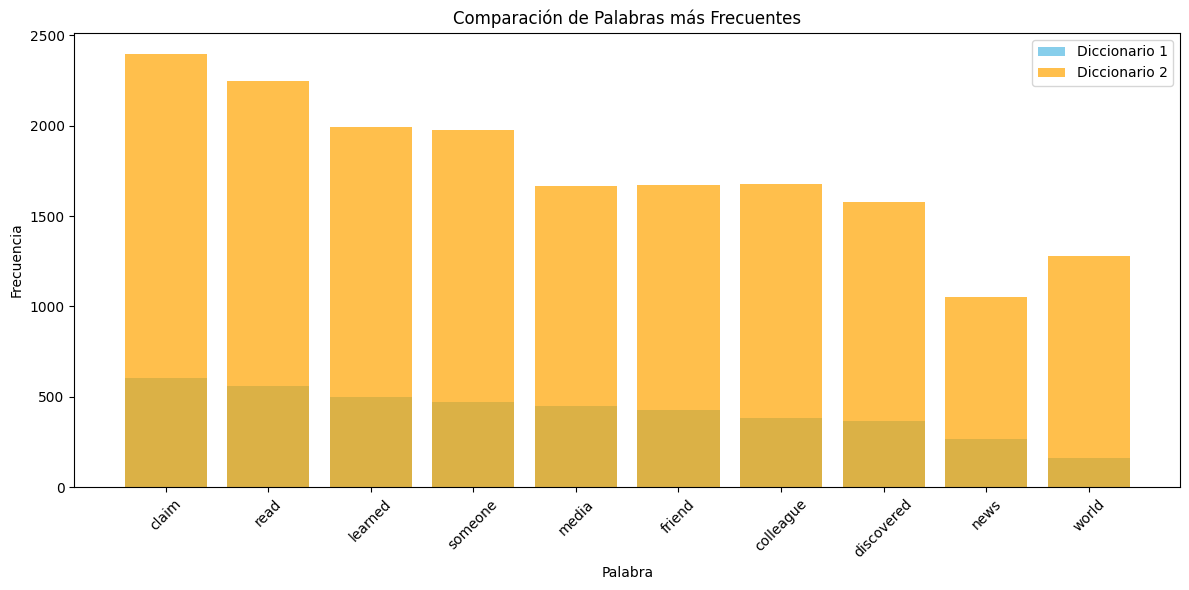

In [165]:

# Supongamos que ya tienes tus diccionarios ordenados diccionario_ordenado y diccionario_ordenado_otro

# Tomamos las 10 palabras con los valores más altos de ambos diccionarios
palabras = list(diccionario_ordenado.keys())[:10]
frecuencias = list(diccionario_ordenado.values())[:10]
frecuencias_otro = [diccionario_ordenado_otro.get(palabra, 0) for palabra in palabras]

# Creamos el gráfico de barras
plt.figure(figsize=(12, 6))

plt.bar([i for i in range(len(palabras))], frecuencias, color='skyblue', label='Diccionario 1')
plt.bar([i for i in range(len(palabras))], frecuencias_otro, color='orange', label='Diccionario 2', alpha=0.7)

plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Comparación de Palabras más Frecuentes')
plt.xticks([i for i in range(len(palabras))], palabras, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [166]:
dicc_baneados = {}
dicc_under_review = {}
dicc_activos = {}
dicc_baneados_limpio = {}
dicc_activos_limpio = {}
dicc_under_review_limpio = {}

palabras_separadoras = ["that", "discovered", "opinion"] # Quitamos por las palabras introductorias que no proporcionan demasiada informacion y manchan mucho
palabras_a_eliminar = ['a','were','as','be','it','most','will','our','at' 'i','more','with', 'the', 'that', 'in', 'on', 'of', 'is', 'an', 'are', 'to', 'my', 'has', 'can', 'from', 'by', 'than', 'was', 'their', 'have', 'for', 'and']

def dividir_por_palabra(cadena, palabras_separadoras):
    for i in palabras_separadoras:
        if i in cadena:
            partes = cadena.split(i)
            return partes[1]
    return cadena

def dic(x, dicc):
    x = dividir_por_palabra(x, palabras_separadoras)
    y = x.split() # esto es la lista
    for i in y:
        if i in dicc:
            dicc[i] += 1
        else:
            dicc[i] = 1

def limpiar(dicc_sucio, dicc_limpio_):
    for clave, valor in dicc_sucio.items():
        if clave not in palabras_a_eliminar:
            dicc_limpio_[clave] = valor

tiktok_baneados['video_transcription_text'].apply(lambda x: dic(str(x), dicc_baneados)) # Llenamos el diccionario
tiktok_under_review['video_transcription_text'].apply(lambda x: dic(str(x), dicc_under_review)) # Llenamos el diccionario
tiktok_activos['video_transcription_text'].apply(lambda x: dic(str(x), dicc_activos)) # Llenamos el diccionario

limpiar(dicc_baneados, dicc_baneados_limpio)
limpiar(dicc_activos, dicc_activos_limpio)
limpiar(dicc_under_review, dicc_under_review_limpio)

diccionario_ordenado_baneados = dict(sorted(dicc_baneados_limpio.items(), key=lambda item: item[1], reverse=True))
diccionario_ordenado_under_review = dict(sorted(dicc_under_review_limpio.items(), key=lambda item: item[1], reverse=True))
diccionario_ordenado_activos = dict(sorted(dicc_activos_limpio.items(), key=lambda item: item[1], reverse=True))

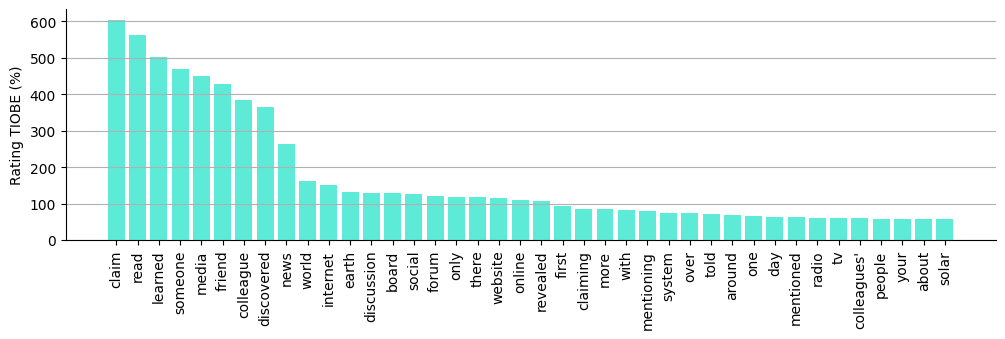

In [167]:
palabras = list(diccionario_ordenado.keys())[:40]
frecuencias = list(diccionario_ordenado.values())[:40]

fig, ax = plt.subplots(figsize=(12,3))
ax.bar(palabras, frecuencias, color='#5DEBD7')
ax.set_ylabel('Rating TIOBE (%)')
ax.yaxis.grid(True)
ax.spines['top'].set_visible(False)   # Ocultar el borde superior
ax.spines['right'].set_visible(False) # Ocultar el borde derecho
plt.xticks(rotation=90)

plt.show()

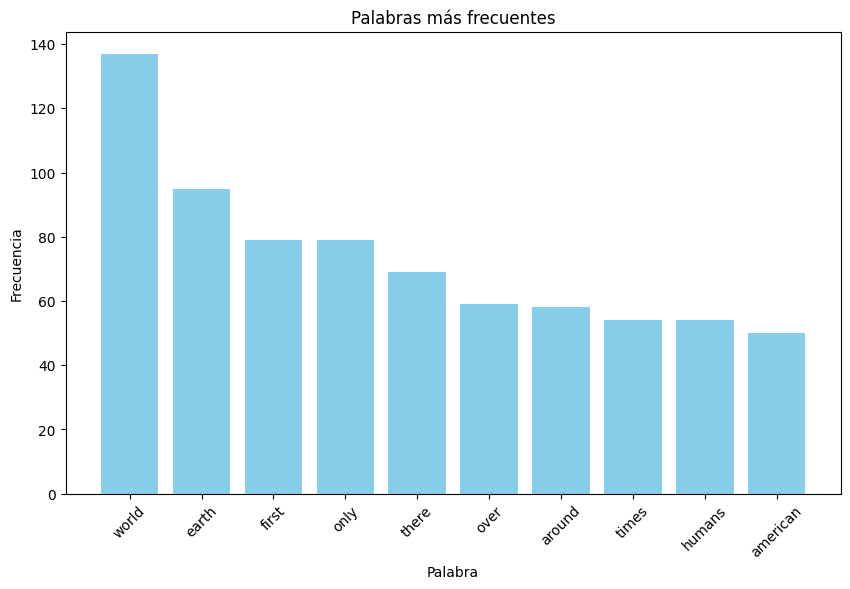

In [168]:
palabras = list(diccionario_ordenado_baneados.keys())[:10]
frecuencias = list(diccionario_ordenado_baneados.values())[:10]

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(palabras, frecuencias, color='skyblue')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes')
plt.xticks(rotation=45)  # Rotamos las etiquetas del eje x para que sean legibles
plt.show()

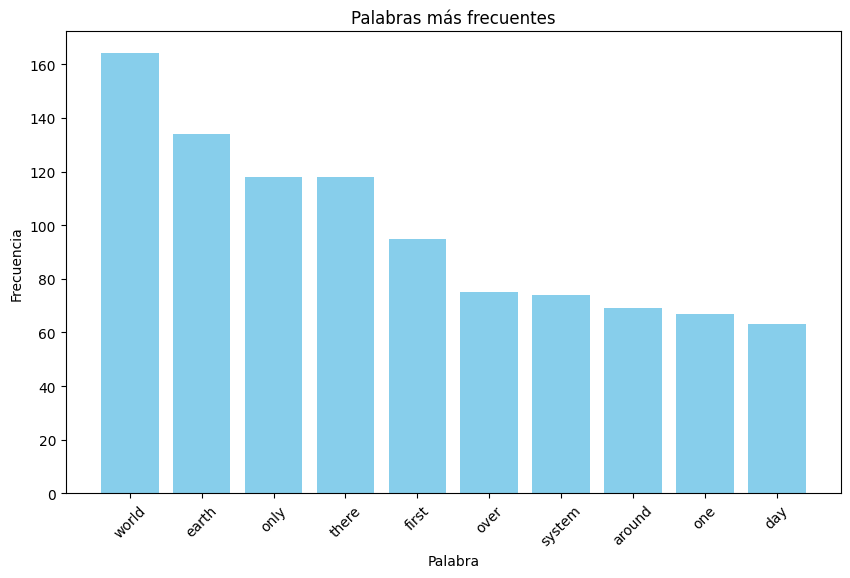

In [169]:
palabras = list(diccionario_ordenado_under_review.keys())[:10]
frecuencias = list(diccionario_ordenado_under_review.values())[:10]

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(palabras, frecuencias, color='skyblue')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes')
plt.xticks(rotation=45)  # Rotamos las etiquetas del eje x para que sean legibles
plt.show()

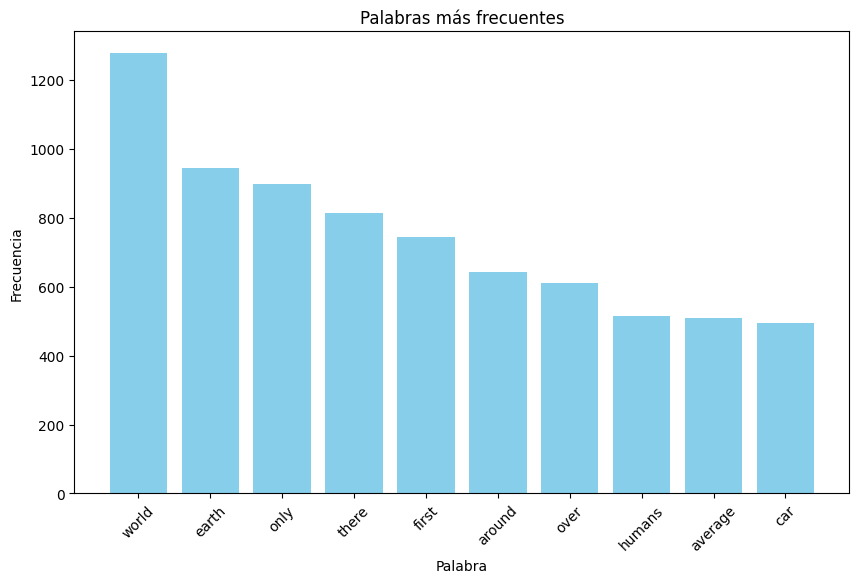

In [170]:
palabras = list(diccionario_ordenado_activos.keys())[:10]
frecuencias = list(diccionario_ordenado_activos.values())[:10]

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(palabras, frecuencias, color='skyblue')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes')
plt.xticks(rotation=45)  # Rotamos las etiquetas del eje x para que sean legibles
plt.show()

In [171]:
# No parece que exista ningun patron en la transcripcion del video

In [172]:
tiktok.head()

,claim_status,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,claim,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,claim,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,claim,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,claim,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,claim,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128
